# Part 1

In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, time, datetime

In [2]:
# import json file
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# create count of logins column
logins['lcount'] = 1
logins.head()

,login_time,lcount
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [4]:
# aggregate every 15 minutes
logins = logins.resample('15Min', on='login_time').lcount.sum()
logins.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: lcount, dtype: int64

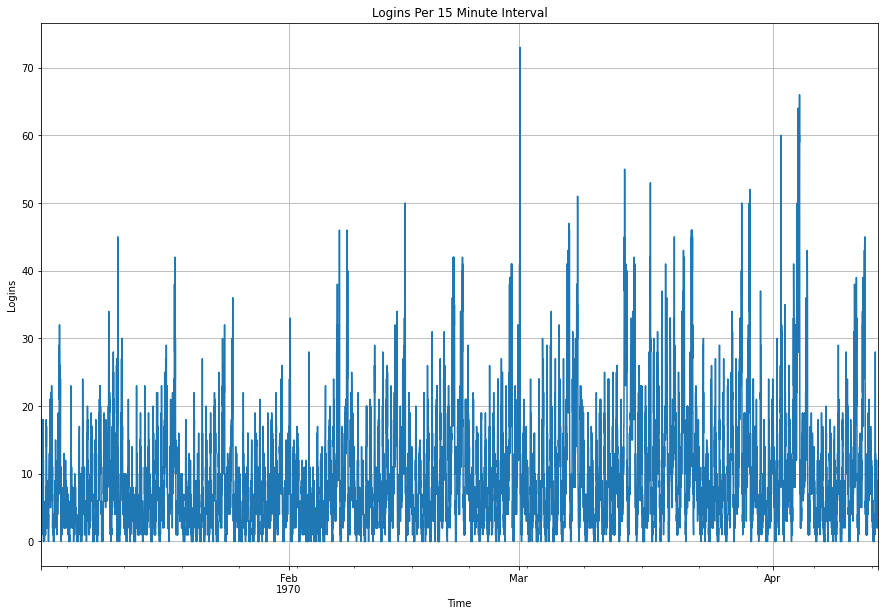

In [5]:
# plot visualization of data
logins.plot(figsize=(15,10), grid=True)
plt.title('Logins Per 15 Minute Interval')
plt.xlabel('Time')
plt.ylabel('Logins')
plt.show()

In [6]:
logins.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: lcount, dtype: float64

The average is about 9.5 logins per 15 minutes and there was one 15 minute interval where there were 73 logins.

In [7]:
logins = pd.DataFrame(logins)
logins.head()

,lcount
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
# change login_time from index to column
logins.reset_index(level=0, inplace=True)
logins.head()

,login_time,lcount
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [9]:
logins.dtypes

login_time    datetime64[ns]
lcount                 int64
dtype: object